## Load the Dataset and importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# For loading the dataset
from sklearn.datasets import fetch_california_housing
# Load the dataset from sklearn
california = fetch_california_housing(as_frame=True)
data =  california.frame

data.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Dataset Description

In [ ]:
#MedInc – Median income of households in the area.

#HouseAge – Median age of the houses in the area.

#AveRooms – Average number of rooms per household.

#AveBedrms – Average number of bedrooms per household.

#Population – Total population living in the area.

#AveOccup – Average number of people per household.

#Latitude – North–south geographic coordinate of the area.

#Longitude – East–west geographic coordinate of the area.

#MedHouseVal – Median house value in the area (target variable).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.shape

(20640, 9)

In [9]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Check for Missing Values and duplicate values.

In [10]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
data.duplicated().sum()


0

## Check Skewness and Outliers

<Figure size 1500x1200 with 0 Axes>

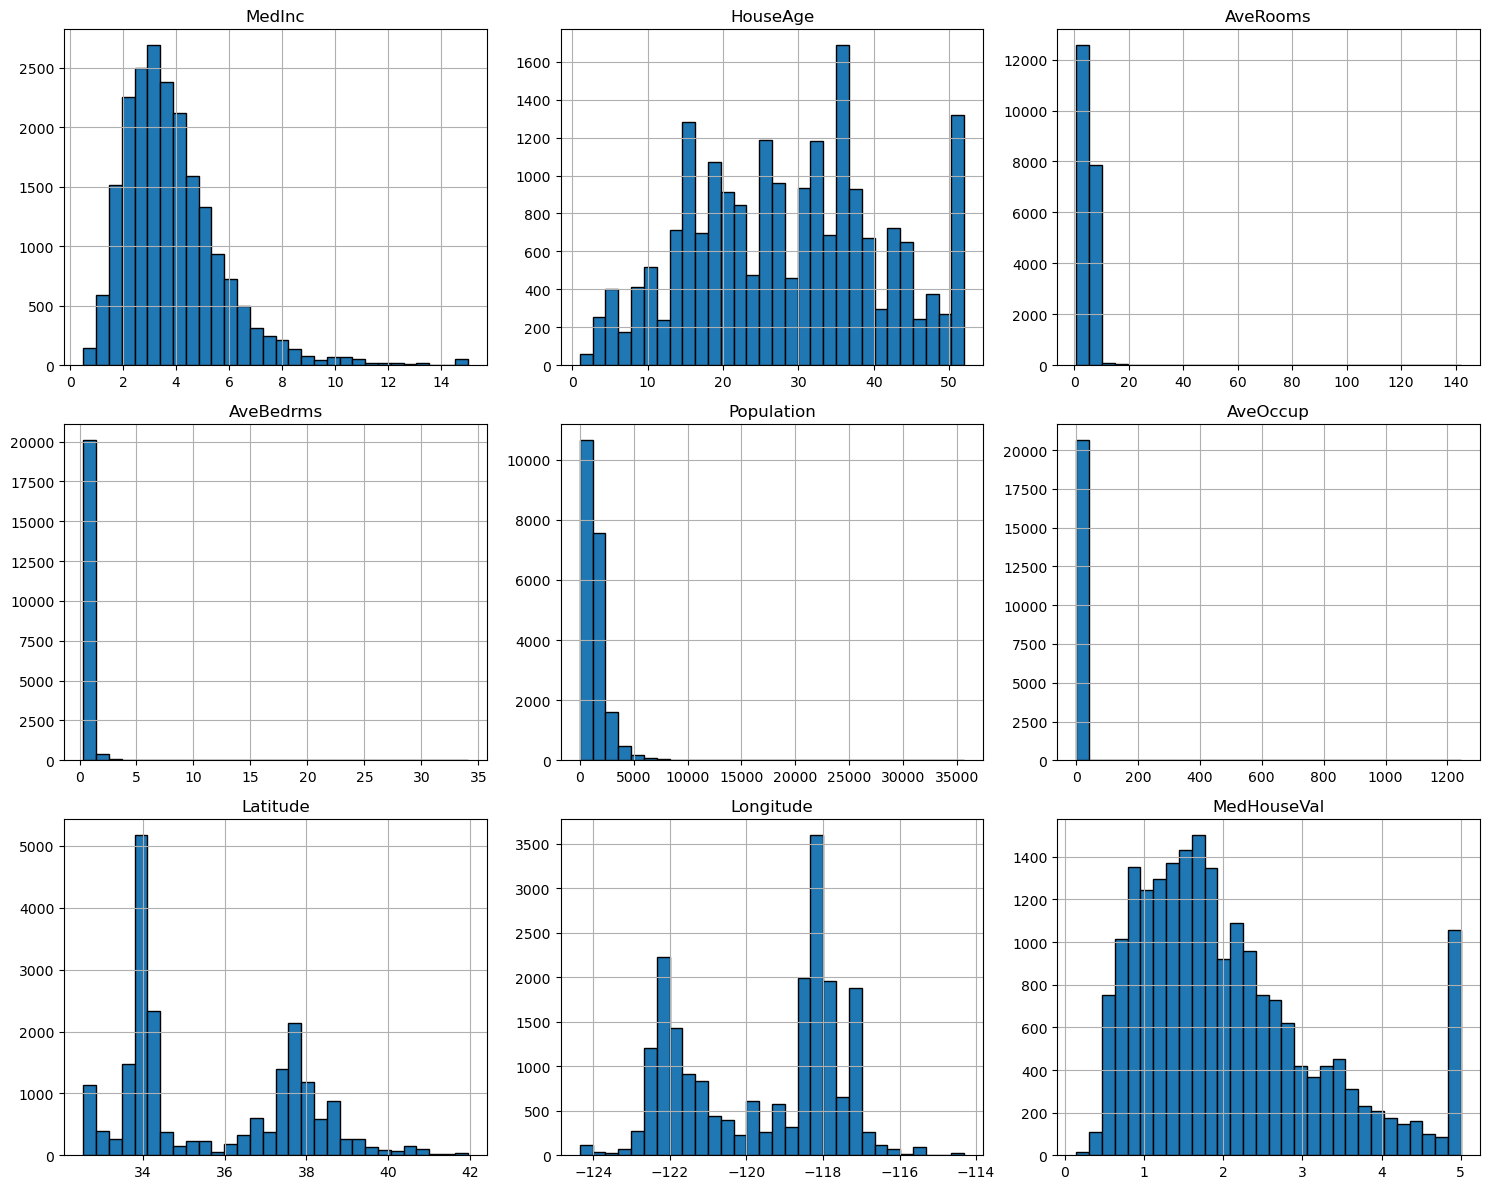

In [12]:
plt.figure(figsize=(15, 12))
data.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.show()


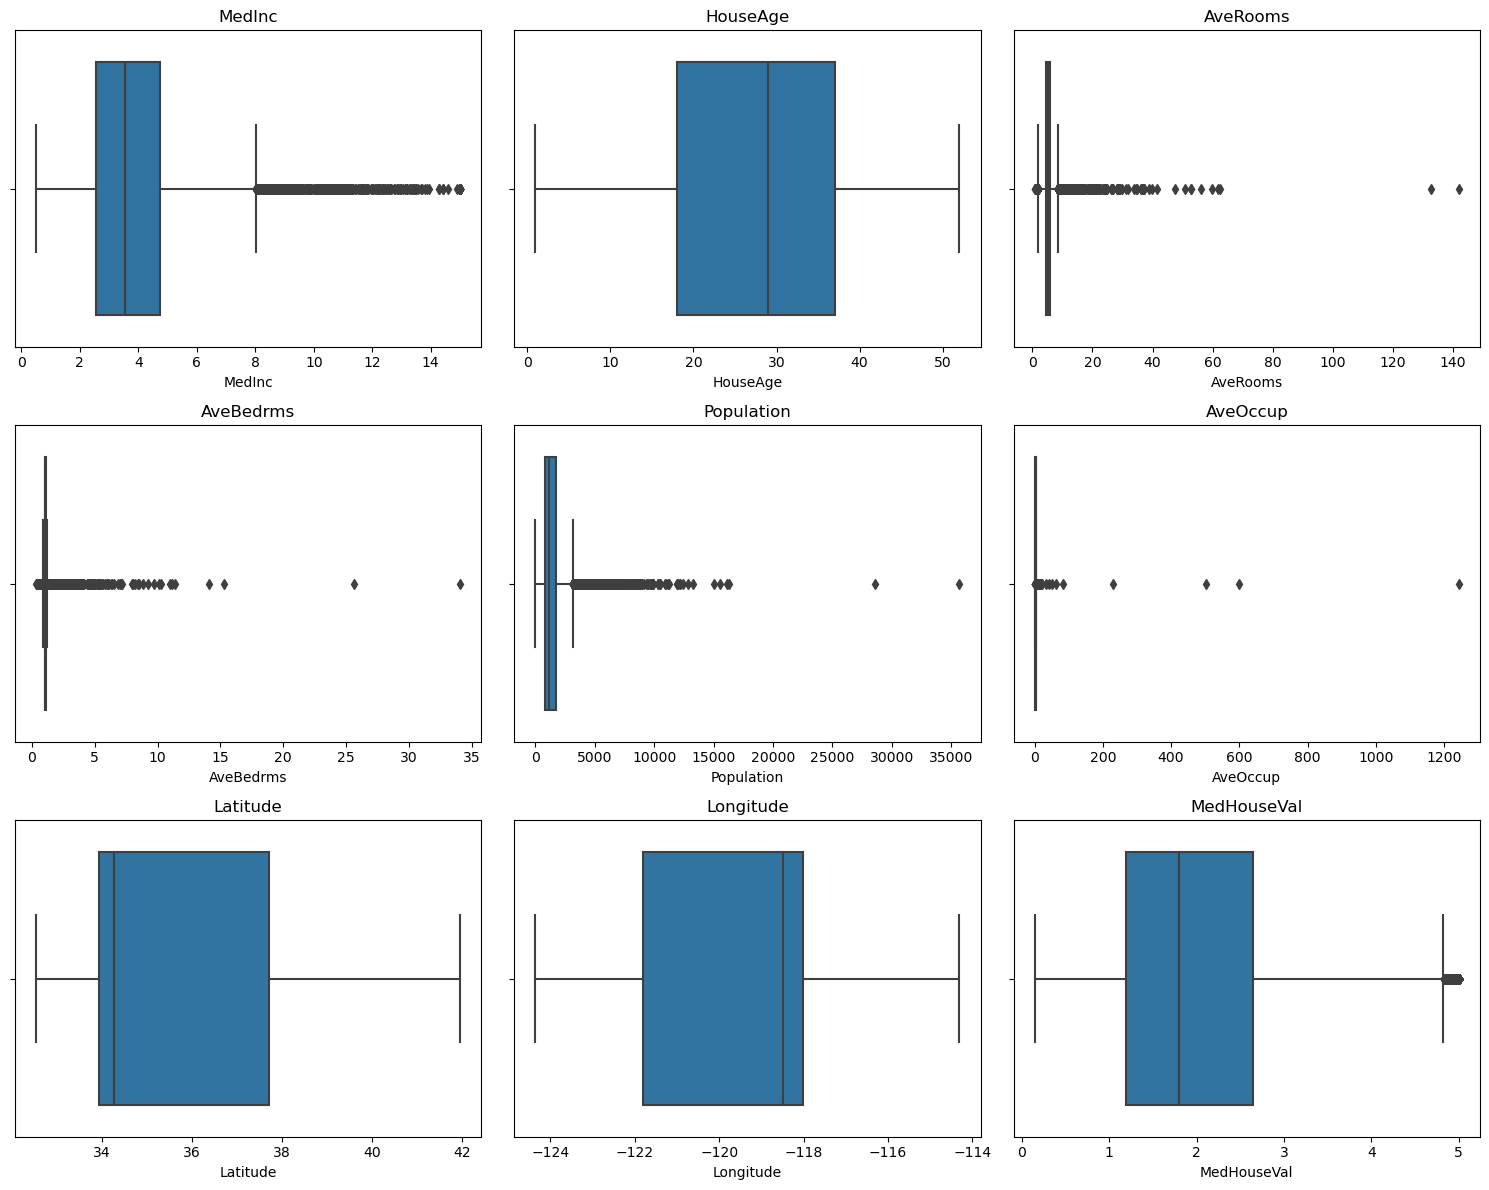

In [13]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## IQR Method To Find The Outliers

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
outliers.sum()


MedInc          681
HouseAge          0
AveRooms        511
AveBedrms      1424
Population     1196
AveOccup        711
Latitude          0
Longitude         0
MedHouseVal    1071
dtype: int64

## Log Transform Skewed Features

In [15]:
import numpy as np

data_log = data.copy()

skewed_cols = ["AveRooms", "AveBedrms", "Population", "AveOccup"]

for col in skewed_cols:
    data_log[col] = np.log1p(data[col])


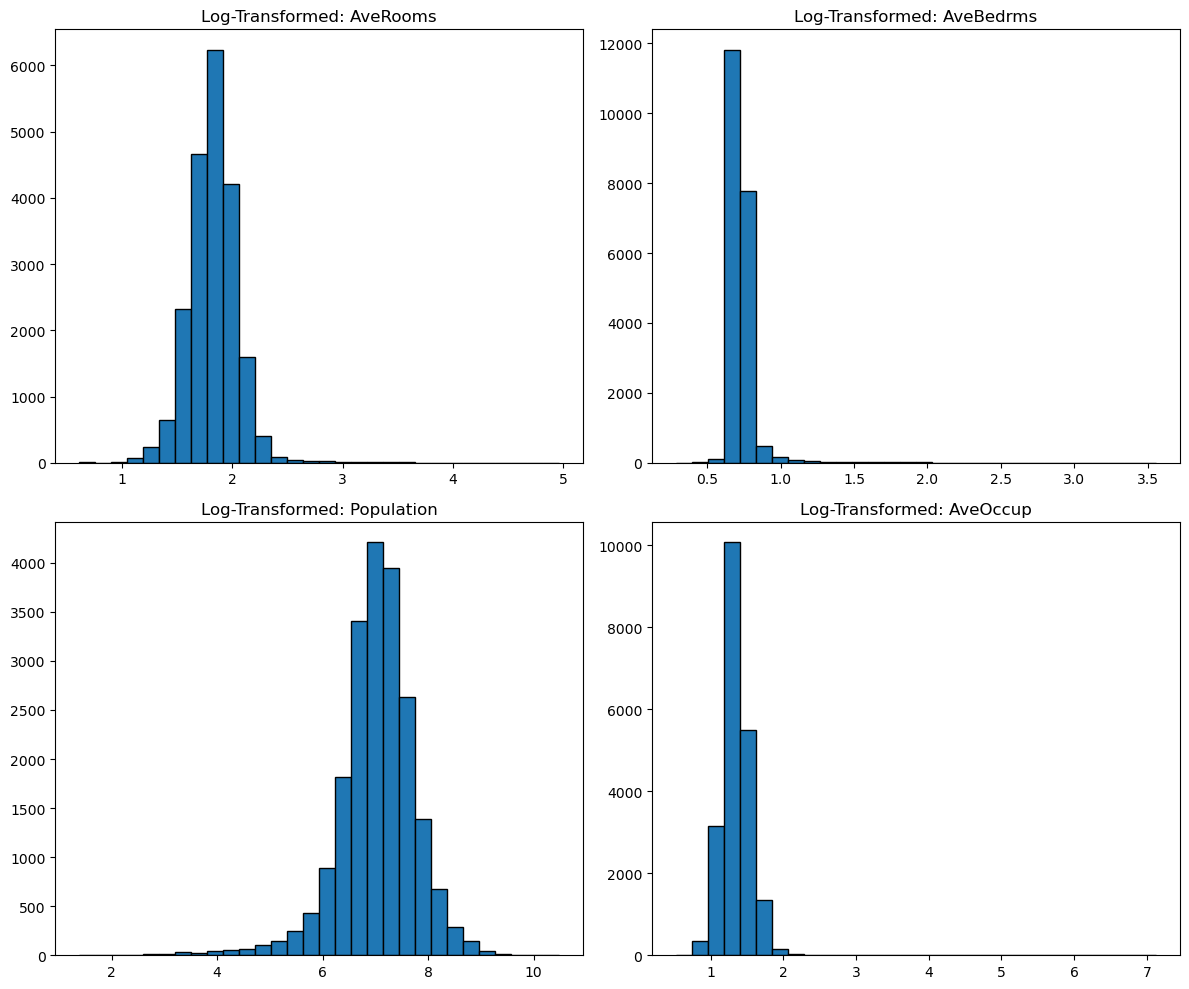

In [17]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(data_log[col], bins=30, edgecolor='black')
    plt.title(f"Log-Transformed: {col}")

plt.tight_layout()
plt.show()


In [18]:
data[skewed_cols].skew()


AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
dtype: float64

In [19]:
data_log[skewed_cols].skew()


AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
dtype: float64

In [22]:
data.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
data_log.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,2.077455,0.704982,5.777652,1.268511,37.88,-122.23,4.526
1,8.3014,21.0,1.979364,0.678988,7.784057,1.134572,37.86,-122.22,3.585
2,7.2574,52.0,2.228738,0.729212,6.208590,1.335596,37.85,-122.24,3.521
3,5.6431,52.0,1.919471,0.729025,6.326149,1.266369,37.85,-122.25,3.413
4,3.8462,52.0,1.985385,0.732888,6.338594,1.157342,37.85,-122.25,3.422


## Train–Test Split and Scale the Training and Testing Data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = data_log.drop("MedHouseVal", axis=1)
y = data_log["MedHouseVal"]

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# 2. Scale using only TRAIN data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3. Apply scaler to TEST data
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 1. Loading and Preprocessing

# I loaded the California Housing dataset using fetch_california_housing from sklearn and converted it into a pandas DataFrame. I checked for missing values using isnull().sum() and found that there were no missing values in the dataset and duplicate values.

# Some columns like AveRooms, AveBedrms, Population, and AveOccup were highly skewed. Since skewed data can affect model performance, I applied a log transformation (np.log1p) to reduce the skewness.

# After that, I performed feature scaling using StandardScaler. Scaling is needed because the features have very different ranges, and models like Linear Regression and SVR work better when the data is standardized. I did the train-test split first and then scaled only the training data to avoid data leakage.

## Build Regression Models and Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    results = {
        "Model used ": model,
        "Train R2": r2_score(y_train, y_pred_train),
        "Test R2": r2_score(y_test, y_pred_test),
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }
    return results


In [31]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)
lr_results


{'Model used ': LinearRegression(),
 'Train R2': 0.661373157024123,
 'Test R2': 0.6437342932018939,
 'MAE': 0.493416818503782,
 'MSE': 0.46685378082757817,
 'RMSE': 0.6832669908810012}

In [32]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_results = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test)
dt_results


{'Model used ': DecisionTreeRegressor(random_state=42),
 'Train R2': 1.0,
 'Test R2': 0.6230316276533556,
 'MAE': 0.4541358284883721,
 'MSE': 0.49398273963590117,
 'RMSE': 0.7028390567092164}

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_results = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)
rf_results


{'Model used ': RandomForestRegressor(random_state=42),
 'Train R2': 0.9735697239971051,
 'Test R2': 0.8054452719988184,
 'MAE': 0.327350200145349,
 'MSE': 0.25494626233196455,
 'RMSE': 0.5049220358946167}

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_results = evaluate_model(gb_model, X_train_scaled, X_test_scaled, y_train, y_test)
gb_results


{'Model used ': GradientBoostingRegressor(random_state=42),
 'Train R2': 0.8048978817773166,
 'Test R2': 0.7756433164710084,
 'MAE': 0.37165044848436773,
 'MSE': 0.29399901242474274,
 'RMSE': 0.5422167577867202}

In [35]:
from sklearn.svm import SVR

svr_model = SVR()
svr_results = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test)
svr_results


{'Model used ': SVR(),
 'Train R2': 0.7944857239525892,
 'Test R2': 0.7686256552900794,
 'MAE': 0.3692089459311818,
 'MSE': 0.30319501864248466,
 'RMSE': 0.5506314726225561}

In [ ]:
# 2. Regression Algorithms :

#A. Linear Regression

#This model tries to fit a straight line between the input features and the target. It is simple and is usually used as a baseline model.

#B. Decision Tree Regressor

#A decision tree splits the data into different groups based on conditions. It can capture non-linear relationships but it often overfits the data.

#C. Random Forest Regressor

#Random Forest is a group of many decision trees. It reduces overfitting and usually gives better accuracy than a single tree.

#D. Gradient Boosting Regressor

#Gradient Boosting builds trees one by one, and each new tree tries to fix the errors of the previous one. It usually performs well on most datasets.

#E. Support Vector Regressor (SVR)

#SVR tries to fit the best line within a certain margin. It works better when the data is scaled

In [36]:
results_df = pd.DataFrame({
    "Linear Regression": lr_results,
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gb_results,
    "SVR": svr_results
})

results_df.T


,Model used,Train R2,Test R2,MAE,MSE,RMSE
Linear Regression,LinearRegression(),0.661373,0.643734,0.493417,0.466854,0.683267
Decision Tree,DecisionTreeRegressor(random_state=42),1.0,0.623032,0.454136,0.493983,0.702839
Random Forest,"(DecisionTreeRegressor(max_features=1.0, rando...",0.97357,0.805445,0.32735,0.254946,0.504922
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.804898,0.775643,0.37165,0.293999,0.542217
SVR,SVR(),0.794486,0.768626,0.369209,0.303195,0.550631


## Best Model Selection

In [ ]:
#  3. Model Evaluation and Comparison

# To compare the models, I used five metrics:

# MSE (Mean Squared Error): Measures how far the predictions are from the actual values. Large errors are punished more.

# MAE (Mean Absolute Error): Tells the average error in the predictions.

# R² score: Shows how much of the variation in the target the model can explain. Higher is better.
# Train R²: Shows how well the model fits the training data.
# Test R²: Shows how well the model performs on unseen data.

# After comparing all models:

# Random Forest performed the best with the highest R² score on the test data.

# Decision Tree performed the worst because it overfitted (Train R² was 1.0 but Test R² was low).

# So, the best model for this dataset is Random Forest, and the worst-performing model is the Decision Tree.